## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Question 1 Answers: 

1) Both regression and clasification are examples of supervised machine learning. With classification, there is prediction of binary or multi-class categories based on the decision boundaries of each class to seperate them. With regression, there is predictions made between independent variables and a continuous dependent variable using a best-fit line.  
2) A confusion table/matrix is used to measure classification model performance by comparing results with predictions, allowing for accuracy to be tested. The table consists of true positives, false positives, true negatives, and false negatives. With this, data scientists can see the accuracy of a model, which helps with improving performance. 
3) Accuracy is the metric for how many predictions the model accurately predicted out of the total number of predictions. Accuracy helps get an estimate of performance, but at the same time a machine learning model which accurately predicts the majority over the minority model would be seen as more accurate than a model that accurately predicts the minority model over the majority, despite the fact that both would have performance issues. 
4) The root mean squared error is the square root of the average squared error (differences between the predicted and actual values), which quantifies the average magnitude of the prediction errors of a machine learning regression model. 
5) Overfitting is when machine learning models capture not just underlying patterns, but also noise/outlighters as it memorizes the training data. It is often caused by an overly complex model, high variance, or not enough data to train on. Underfitting is when machine learning models are too simple, and not able to fully predict based on patterns, causing poor preformance. It is often caused by not enough training, an overly simple model, or high bias.
6) Training sets are used to help models learn patterns, while the testing set evaluates model performance on new data. Splitting up the data into multiple sets makes sure that the model is actually learning based on new data instead of just memorizing an existing set, which allows for less bias. 
7) Reporting a class as a prediction (aka a specific class label) allows for simple, clear interpretations, since there is not ambiguity in the answers. However, it does not provide information on how high the probability is (for example, a prediction that is 51% and 99% would return as the same output). Reporting a class as a probability (based on percentages) allows for more information to be provided on the certainty of the prediction. However, they have potentially higher computational loads, as well as being less simple to interpret.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.


          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
      voltage    height  soil  mine_type
333  0.323262  0.909091   0.4          5
334  0.444108  0.181818   1.0          5
335  0.353474  0.454545   1.0          5
336  0.362537  0.727273   1.0          5
337  0.314199  1.000000   1.0          5


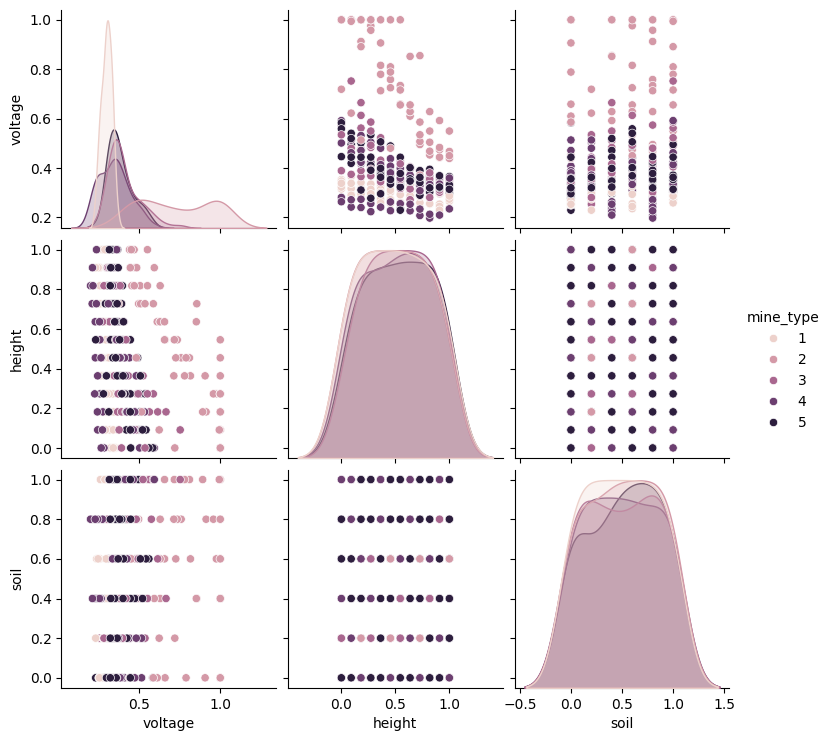

In [ ]:
#2.1. Load the data. Perform some EDA
# summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/land_mines.csv')
data = data.dropna()  # Drop rows with missing values
print(data.describe())
print(data.head(5))
print(data.tail(5))

sns.pairplot(data, hue='mine_type')
plt.show()


In [50]:
#2.2. Split the sample 50/50 into training and test/validation sets. 
# (The smaller the data are, the more equal the split should be, in my experience: 
# Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
from sklearn.model_selection import train_test_split

X = data[['voltage', 'height', 'soil']]
y = data['mine_type']

# 50/50 split; stratify to keep class proportions roughly even
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)

best k according to test accuracy: 2


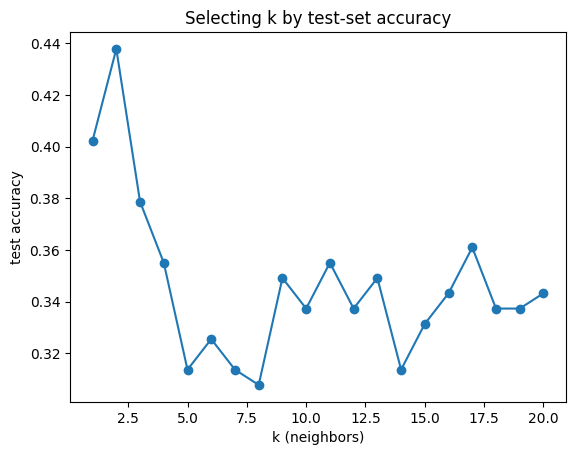

In [51]:
#2.3. Build a $k$-NN classifier. Explain how you select $k$.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

import matplotlib.pyplot as plt

# run through a grid of k values and record test‑set accuracy
k_grid = range(1, 21)
accs = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    accs.append(acc)

best_k = k_grid[int(np.argmax(accs))]
print("best k according to test accuracy:", best_k)

plt.plot(k_grid, accs, marker='o')
plt.xlabel('k (neighbors)')
plt.ylabel('test accuracy')
plt.title('Selecting k by test‑set accuracy')
plt.show()

# explanation:
# we build the classifier with the training split and evaluate its performance
# on the test split for a range of k values.  The value of k that maximises
# accuracy (or minimizes misclassification rate) on the test data is chosen.
# K = 2 is the best k value according to test accuracy. 

In [52]:
#2.4. Evaluate the performance of your model using a confusion matrix and accuracy score.
from sklearn.metrics import confusion_matrix, accuracy_score

best_model = KNeighborsClassifier(n_neighbors=2)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))

print("\naccuracy:", accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred,
            rownames=['actual'], colnames=['predicted'],
            margins=True)


accuracy: 0.4378698224852071


predicted,1,2,3,4,5,All
actual,,,,,,
1,25,0,6,4,1,36
2,0,32,0,3,0,35
3,12,2,9,6,4,33
4,12,5,8,8,0,33
5,15,2,10,5,0,32
All,64,41,33,26,5,169


2.5 The classifier is doing rather well on some mine‑types and very poorly on others.  
In the confusion table you can see rows with quite a few correct hits (e.g. type 2), but there's no correct hit for type 5. This model may be useful to predict type 2 as its prediction has a very high accuracy. But we can't still sorely rely on this model as it is not correct all the time. This model should also be combined with other information in practice.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1) Load the `./data/USA_cars_datasets.csv`. Keep the following variables and 
# drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look 
# at the head and dimensions of the data.

df = pd.read_csv('./data/USA_cars_datasets.csv', encoding='latin1')
df = df[['price', 'year', 'mileage']]

print(df.isna().sum()) # no NAs to handle
print()
print(df.head())
print()
print("shape:", df.shape)


price      0
year       0
mileage    0
dtype: int64

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

shape: (2499, 3)


In [54]:
# 3.2) Maxmin normalize `year` and `mileage`.
def MinMaxScaler(x):
    return (x - x.min()) / (x.max() - x.min())

df[['year', 'mileage']] = df[['year', 'mileage']].apply(MinMaxScaler)

In [55]:
# 3.3) Split the sample into ~80% for training and ~20% for 
# hyper-parameter selection and evaluation.

import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100
)

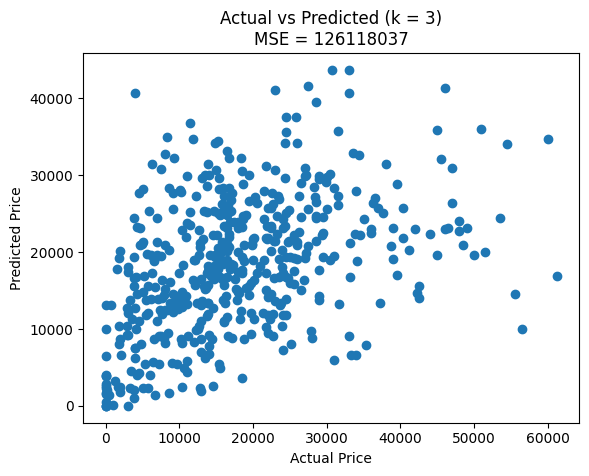

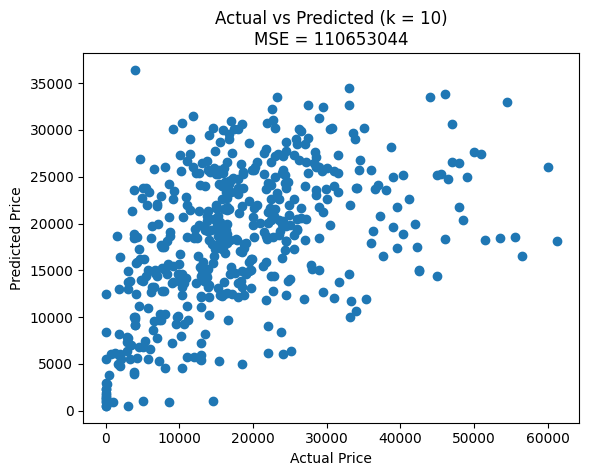

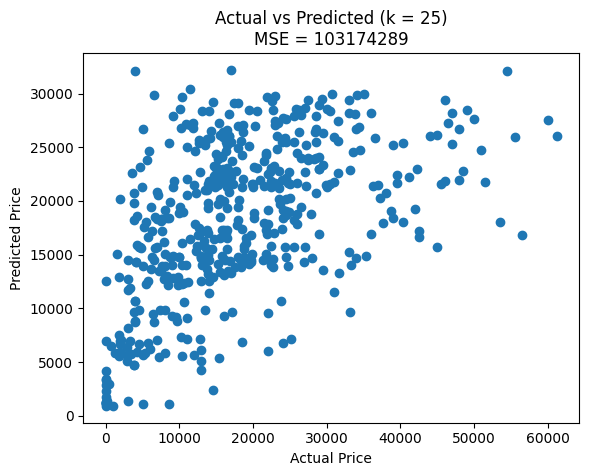

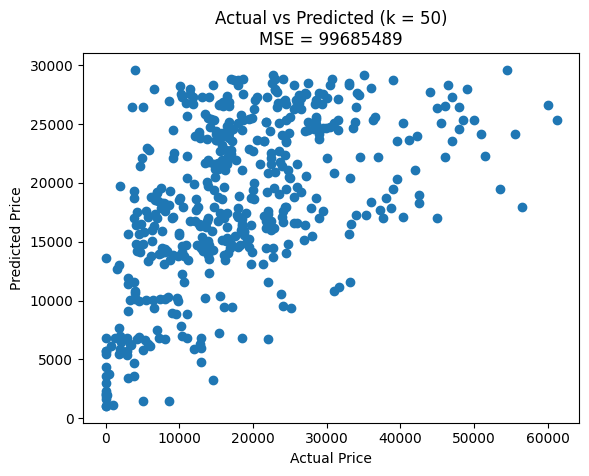

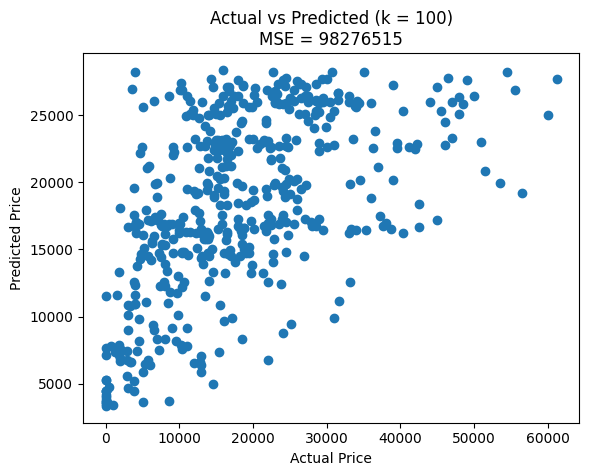

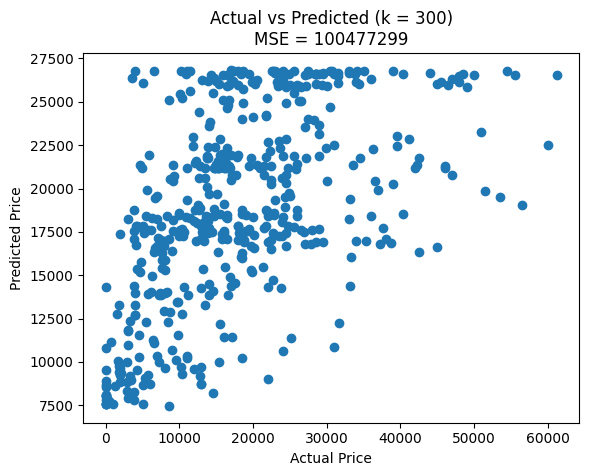

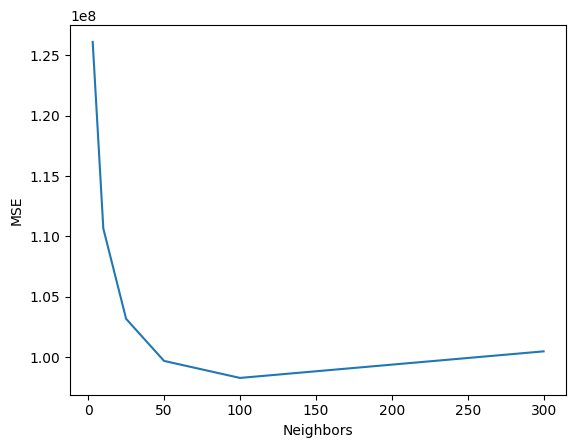

In [56]:
# 3.4) Use the k-NN algorithm and the training data to predict 
# `price` using `year` and `mileage` for the test set for 
# k=3,10,25,50,100,300. For each value of k, compute the mean squared 
# error and print a scatterplot showing the test value plotted against 
# the predicted value. What patterns do you notice as you increase k?
from sklearn.metrics import mean_squared_error

k_grid = [3, 10, 25, 50, 100, 300]
mses = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors = k) # create a model instance
    model = model.fit(X_train,y_train) # fit the model
    y_hat = model.predict(X_test) # predict values
    mse = mean_squared_error(y_test, y_hat)
    mses.append(mse)

    plt.figure()
    plt.scatter(y_test, y_hat)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k = {k})\nMSE = {mse:.0f}")
    plt.show()

sns.lineplot(x=k_grid, y=mses).set(ylabel='MSE', xlabel='Neighbors')
plt.show()

# For small k, predictions are highly dispersed and vary a bit more. 
# As k increases, predictions align more closely with actual prices and MSE decreases. 

In [57]:
# 3.5) Determine the optimal k for these data.

# The optimal k would be 100.

best_k = k_grid[np.argmin(mses)]
print("optimal k:", best_k)


optimal k: 100


In [58]:
# 3.6) Describe what happened in the plots of predicted versus actual prices as k varied, 
# taking your answer into part 6 into account. 
# (Hint: Use the words "underfitting" and "overfitting".)

# The optimal value of k is 100 because it minimizes the test MSE. 
# For small values of k (3, 10, etc.), the model overfits the data, 
# producing highly variable predictions and a large MSE. As k increases, 
# the predictions become smoother and the MSE decreases. 
# However, for very large k (300), the model begins to underfit, 
# with predictions shrinking toward the mean price and the MSE increasing again.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.
There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

In [59]:
import pandas as pd
#1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`
# so use `.loc` to column filter the dataframe to those variables.
data = pd.read_csv('./data/airbnb_hw.csv')
airbnb = data[['Review Scores Rating', 'Price', 'Beds']]
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb[['Review Scores Rating', 'Price', 'Beds']] = airbnb[['Review Scores Rating', 'Price', 'Beds']].astype(float)
airbnb.head(10)


/var/folders/_r/q2w66t197159fjr99b6g6fh00000gn/T/ipykernel_14981/1241996630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['Price'] = airbnb['Price'].str.replace(',', '')
/var/folders/_r/q2w66t197159fjr99b6g6fh00000gn/T/ipykernel_14981/1241996630.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb[['Review Scores Rating', 'Price', 'Beds']] = airbnb[['Review Scores Rating', 'Price', 'Beds']].astype(float)


,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
4,96.0,549.0,3.0
5,100.0,149.0,1.0
6,100.0,250.0,1.0
7,94.0,90.0,1.0
8,90.0,270.0,2.0
9,96.0,290.0,2.0


In [60]:
#2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values.
# Set those aside in a different dataframe. We'll make predictions about them later.
toPredict = airbnb[airbnb['Review Scores Rating'].isnull()]
training = airbnb[airbnb['Review Scores Rating'].notnull()]

In [61]:
#3. Use `df = df.dropna(axis = 0, how = 'any')`
#to eliminate any observations with missing values/NA's from the dataframe.
training = training.dropna(axis = 0, how = 'any')
toPredict

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
13,NaN,68.0,1.0
...,...,...,...
30473,NaN,300.0,5.0
30474,NaN,125.0,2.0
30475,NaN,80.0,1.0
30476,NaN,35.0,1.0


In [62]:
#4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`.
# How do you choose $k$? 
# (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X = training[['Price', 'Beds']]
y = training[['Review Scores Rating']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
)

SSEs = []
Ks = list(range(1, 20))

for k in Ks:
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    sse = ((y_test - y_hat)**2).values.sum()
    SSEs.append(sse)

px.line(
    x=Ks, 
    y=SSEs, 
    labels={'x': 'Neighbors (k)', 'y': 'SSE'},
    title='Optimal K'
)
#SSM keeps decreasing but slow down after 8-10. 
#So I choose 10 as my k value to have a relatively good prediction and prevent underfitting.



In [63]:
#5. Predict the missing ratings. 
model = KNeighborsRegressor(n_neighbors = 10)
model = model.fit(X_train,y_train)
x = toPredict[['Price', 'Beds']].dropna()
y = model.predict(x)

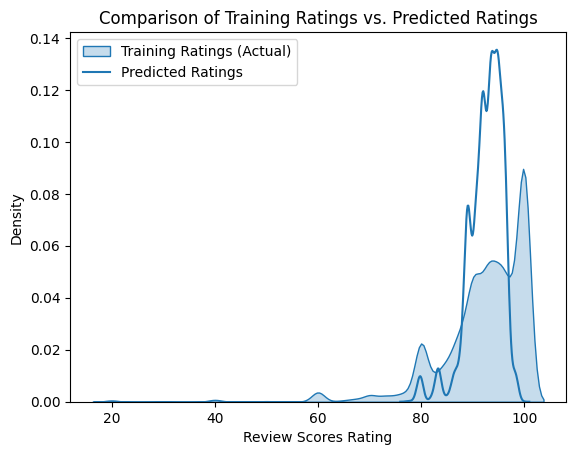

In [64]:
#6. Do a kernel density plot of the training ratings and the predicted missing ratings. 
#Do they look similar or not? Describe what you see.
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_train, label='Training Ratings (Actual)', fill=True)

sns.kdeplot(y, label='Predicted Ratings',)

plt.title('Comparison of Training Ratings vs. Predicted Ratings')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()
plt.show()
#two desity graph show a similar trend but they varies a little in the maximum value and shape.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)